# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [4]:
ad_data = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

In [13]:
sns.set_style('whitegrid')

Text(0.5, 0, 'Age')

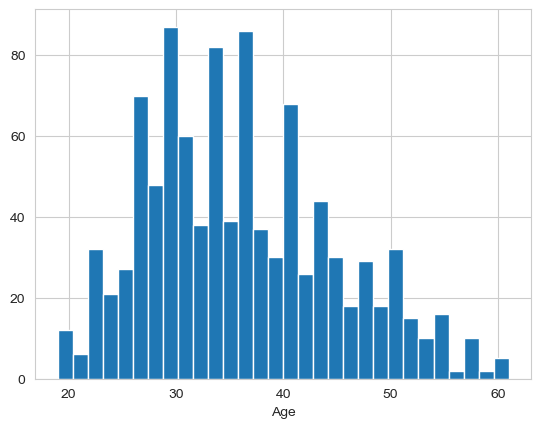

In [16]:
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

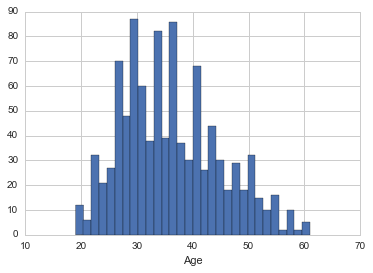

**Create a jointplot showing Area Income versus Age.**

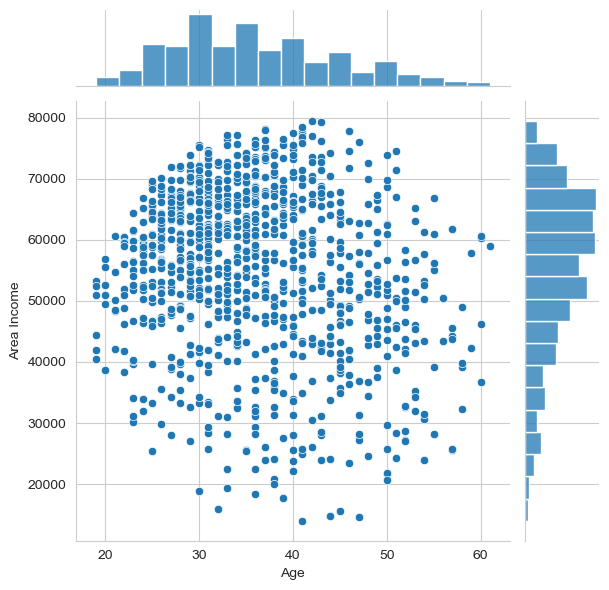

In [18]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

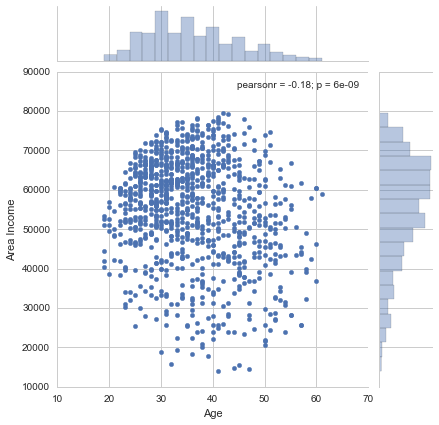

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

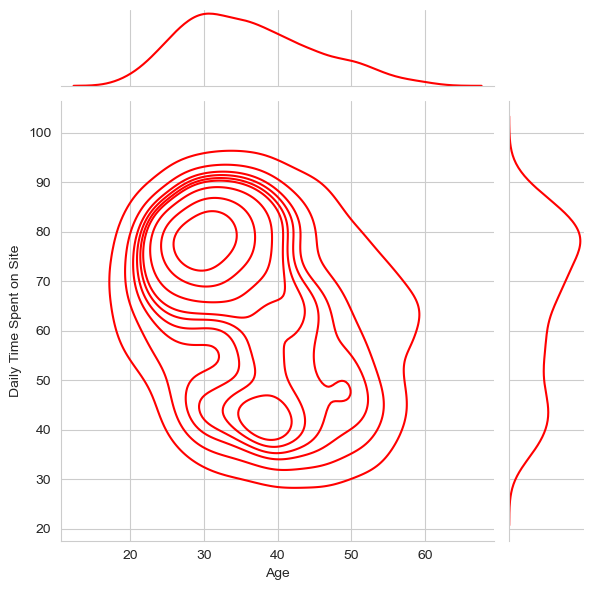

In [28]:
# sns.jointplot(x='Age', y='Daily Time Spent on Site', data = ad_data, color = 'red', kind='kde')
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red', kind='kde')

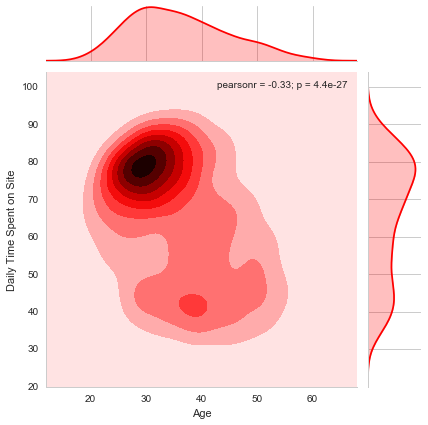

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

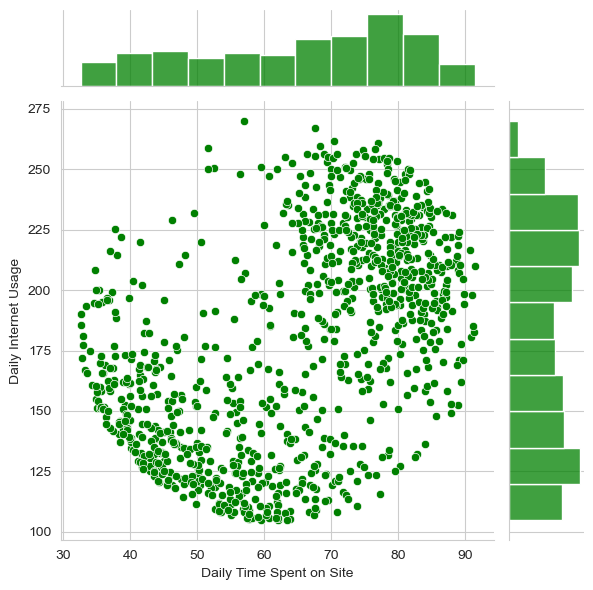

In [30]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

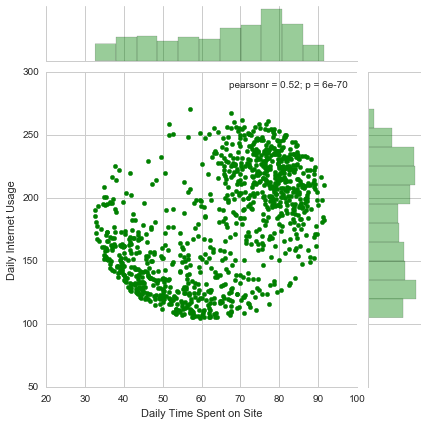

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

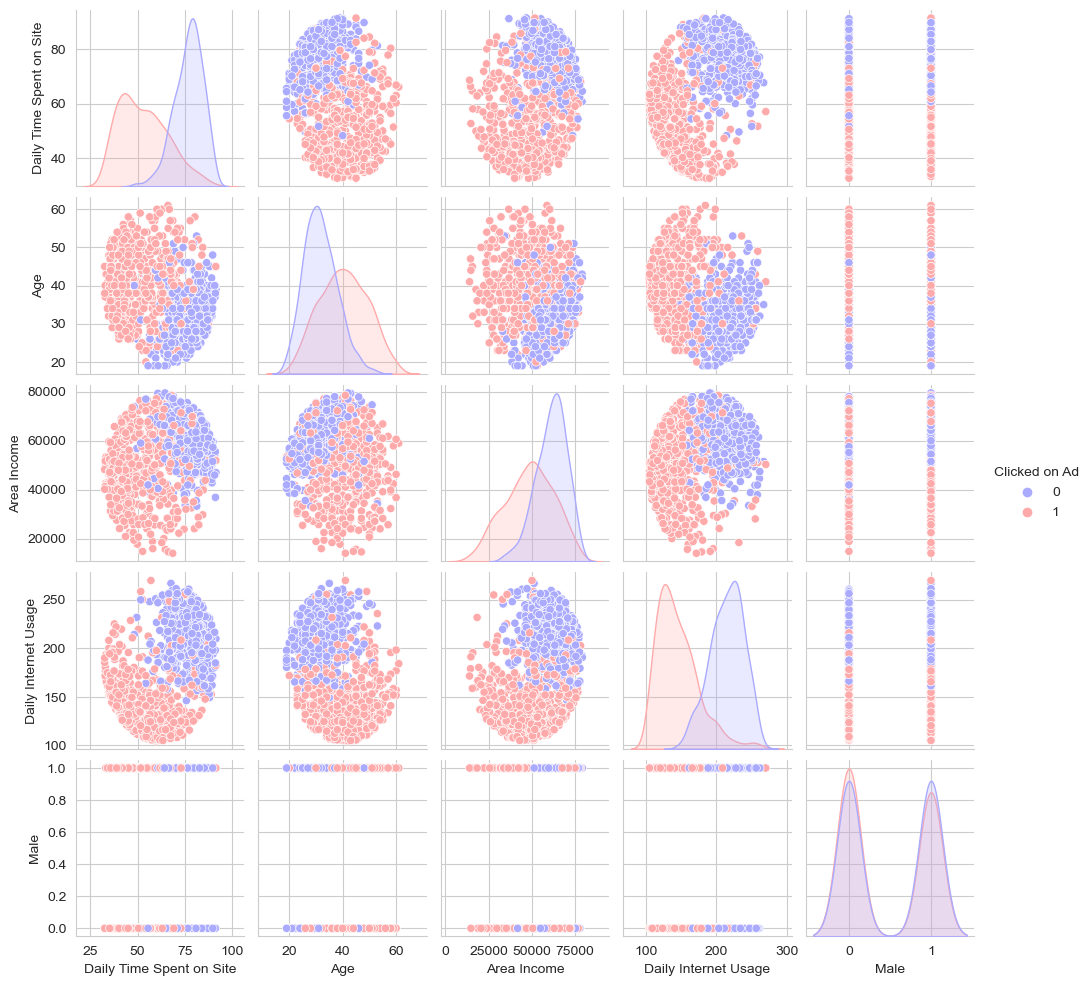

In [35]:
sns.pairplot(data=ad_data, hue='Clicked on Ad',palette='bwr', height=2)

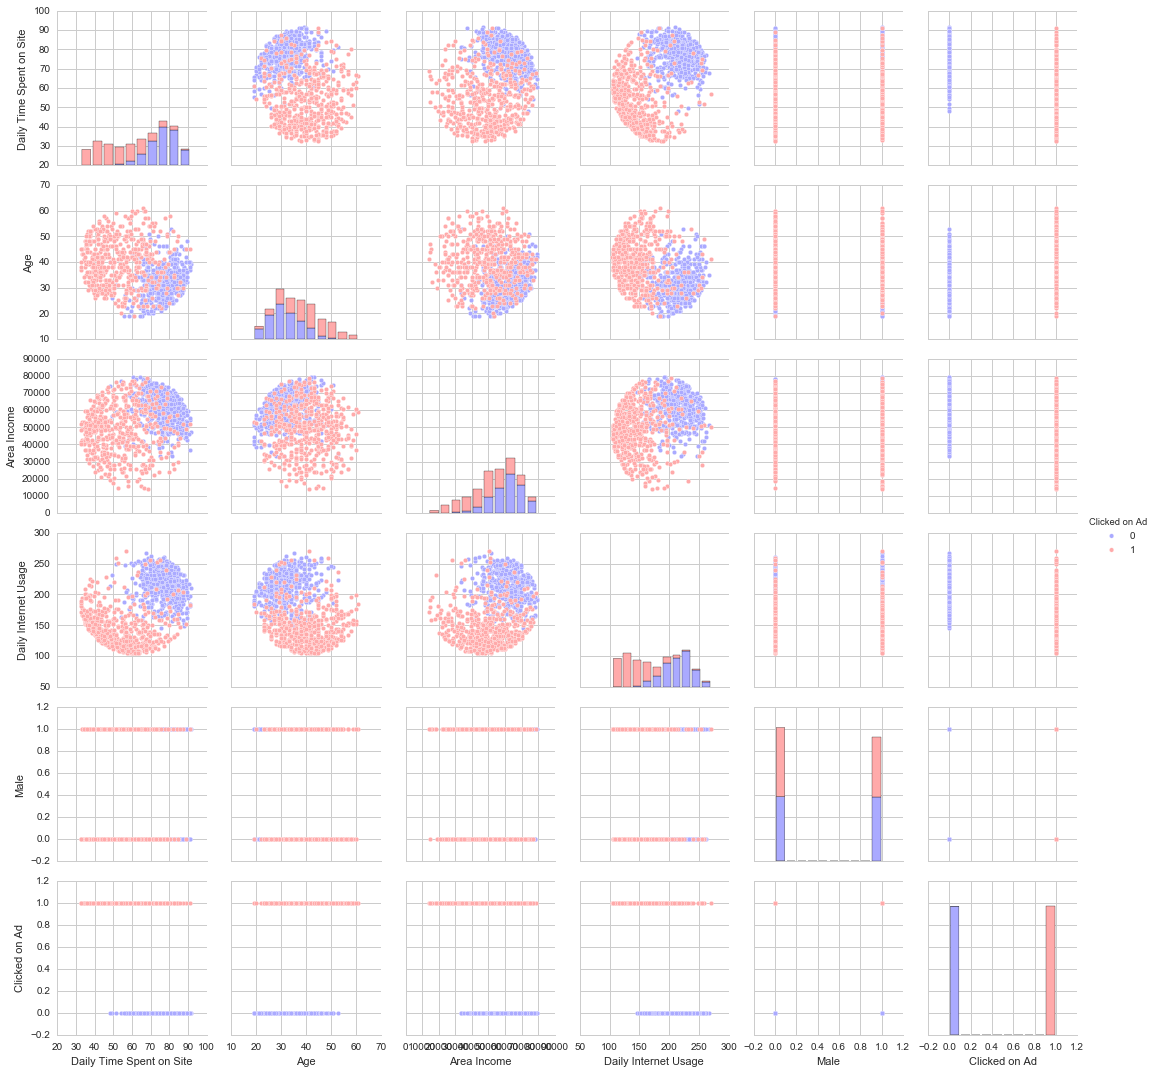

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [36]:
from sklearn.model_selection import train_test_split

In [41]:
X = ad_data[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [47]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [51]:
Bảng kết quả classification_report là một bảng tổng hợp các chỉ số đánh giá hiệu suất (performance metrics) của mô hình phân loại 
trên tập dữ liệu kiểm tra (test set). Bảng này giúp bạn đánh giá hiệu suất của mô hình trong việc dự đoán các nhãn (classes) trên 
tập dữ liệu không được sử dụng trong quá trình huấn luyện.

precision (độ chính xác): Là tỷ lệ giữa số lượng dự đoán đúng của một lớp (class) và tổng số lượng các dự đoán thuộc lớp đó. 
Nó cho biết khả năng của mô hình trong việc đúng dự đoán các trường hợp thuộc lớp cần phân loại. Đối với lớp 0, độ chính xác là 
0.85 và cho lớp 1, độ chính xác là 0.96.

recall (độ phục hồi, độ nhớ): Là tỷ lệ giữa số lượng dự đoán đúng của một lớp và tổng số lượng thực sự thuộc lớp đó trong dữ 
liệu. Nó thể hiện khả năng của mô hình trong việc tìm ra được các trường hợp thực sự thuộc lớp cần phân loại. Đối với lớp 0, 
độ nhớ là 0.96 và cho lớp 1, độ nhớ là 0.84.

f1-score (điểm F1): Là một số liệu kết hợp độ chính xác và độ nhớ, dùng để đánh giá hiệu suất tổng thể của mô hình. Nó được 
tính bằng công thức: F1 = 2 * (precision * recall) / (precision + recall). Đối với lớp 0, F1-score là 0.90 và cho lớp 1,
F1-score là 0.89.

support (hỗ trợ): Là số lượng thực sự của mỗi lớp trong tập dữ liệu kiểm tra. Trong trường hợp này, có 146 mẫu thuộc lớp 0
và 154 mẫu thuộc lớp 1.

accuracy (độ chính xác toàn bộ): Là tỷ lệ giữa số lượng dự đoán đúng và tổng số lượng dự đoán trên toàn bộ dữ liệu kiểm tra. 
Nó cho biết tổng thể khả năng dự đoán đúng của mô hình. Trong trường hợp này, độ chính xác toàn bộ là 0.90, tức là mô hình dự 
đoán đúng khoảng 90% các mẫu trong tập kiểm tra.


macro avg và weighted avg: Đây là hai phép trung bình của các chỉ số precision, recall và f1-score. Macro avg tính trung bình 
không trọng số cho các lớp, trong khi weighted avg tính trung bình dựa trên tỷ lệ mẫu của từng lớp. Trong trường hợp này, cả 
macro avg và weighted avg đều cho kết quả là 0.90.

SyntaxError: invalid syntax (3406619077.py, line 2)

## Great Job!